# Vertical structure

This notebook demonstrates how to create a zonal mean warming pattern in the atmosphere

### Import packages and define fucntions for calculations

In [4]:
'''Import packages for loading data, analysing, and plotting'''

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma


import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import warnings
warnings.filterwarnings("ignore")

# Plot 1:  Latitude -- Height plot for the atmosphere

## Open the 3D fields and compute the differences 

In [2]:
# FOR THE GEOGRAPHY CLUSTER

variable_name='ta'
filename_a='/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp370/r1i1p1f2/Amon/ta/gn/v20190510/ta_Amon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_205001-210012.nc'
filename_b='/data/CMIP/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/ta/gn/v20190406/ta_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'


In [3]:
# FOR THE OWN LAPTOP: THIS REQUIRES PRIOR KNOWLEDGE OF THE FILE NAMES.
# EACH FILE IS AROUND 1 GiB! AND THIS IS THE EDGE OF MY (small) LAPTOP'S CAPABILITIES

variable_name='ta'
filename_a='Data/ta_Amon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_205001-210012.nc'
filename_b='Data/ta_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'
#Download the files if they are not already here
import os
import urllib
if not os.path.isfile(filename_a):
    print('Downloading %s' %(filename_a))
    !mkdir Data
    urllib.request.urlretrieve("http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/cmip6_UKESM1_data/ssp370/Amon/ta/gn/v20190510/ta_Amon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_205001-210012.nc", filename_a)    
    
if not os.path.isfile(filename_b):
    print('Downloading %s' %(filename_b))
    urllib.request.urlretrieve("http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/cmip6_UKESM1_data/historical/Amon/ta/gn/v20190406/ta_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc", filename_b)


In [4]:
#This cell actually load the 3D data
expt_a_file=Dataset(filename_a)
expt_a=expt_a_file[variable_name][:]
lat=expt_a_file['lat'][:]
lon=expt_a_file['lon'][:]
lev=expt_a_file['plev'][:]
expt_b_file=Dataset(filename_b)
expt_b=expt_b_file[variable_name][:]
expt_a_file.close()
expt_b_file.close()

In [5]:
# Now we take the time-averages
ta_a=np.average(expt_a,axis=0)
ta_b=np.average(expt_b,axis=0)

In [6]:
# And compute the difference between them
diff=ta_a-ta_b

#This is still 3D, so we need to compute the zonal mean
zonal_diff=np.nanmean(np.array(diff),axis=2)

## Plot a vertical profile of atmosphere

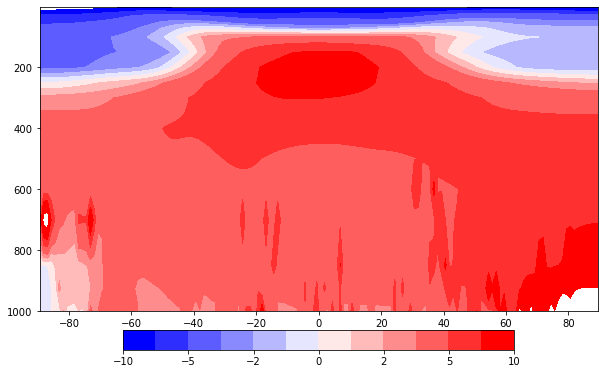

In [7]:
cmap=plt.get_cmap('bwr') #define colormap

#define colormap's range and scale

bounds = [-10,-7,-5,-3,-2,-1,0,1,2,3,5,7,10]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)


plt.figure(figsize=(10,7))

ax = plt.axes()
fig=ax.contourf(lat,lev*0.01,np.array(zonal_diff),levels=bounds,cmap=cmap,norm=norm)
ax.invert_yaxis()


cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)

This plot shows that only the troposphere is warming - the stratosphere (upper atmosphere) is cooling. The higher you go into the troposphere the more it warms, especially over the Equator. The Arctic (on the right) is warming more than the rest of the globe. 

# Plot 2: Latitude -- Depth plot for the Ocean

## Plot the mean meridional mass overturning streamfunction in the north Atlantic Ocean under ssp585 scenario directly from UKESM1 output

### Required data can be downloaded from the geography server:

/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Omon/msftyz/gn/v20190819/msftyz_Omon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_201501-204912.nc

/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Omon/msftyz/gn/v20190819/msftyz_Omon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_205001-210012.nc


In [5]:
#open and concatenate two files  
ds = xr.open_mfdataset('msftyz_*.nc', autoclose=True, decode_times=False)

In [8]:
#create and save the new file which covers the time period of 2015-2100
new_filename_1 = 'ssp585_ukesm1_combined.nc'
ds.to_netcdf(path=new_filename_1)

In [10]:
filename_2='ssp585_ukesm1_combined.nc'
ukesm1_ssp585=xr.open_dataset(filename_2,decode_times=False)
print(ukesm1_ssp585)

<xarray.Dataset>
Dimensions:    (basin: 3, bnds: 2, lev: 75, rlat: 330, time: 1032)
Coordinates:
    sector     (basin) |S21 ...
  * rlat       (rlat) float64 -85.35 -85.19 -85.04 -84.89 ... 81.73 81.77 81.79
  * lev        (lev) float64 0.0 1.024 2.103 ... 5.393e+03 5.596e+03 5.8e+03
  * time       (time) float64 5.942e+04 5.944e+04 ... 9.032e+04 9.034e+04
Dimensions without coordinates: basin, bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    lev_bnds   (time, lev, bnds) float64 ...
    rlat_bnds  (time, rlat, bnds) float64 ...
    msftyz     (time, basin, lev, rlat) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   59400.0
    branch_time_in_parent:  59400.0
    creation_date:          2019-08-19T10:32:59Z
    cv_version:             6.2.20.1
    data_specs_version:     01.00.29
    experiment:             update of RCP8.5 based on SSP5
    experi

In [11]:
print(ukesm1_ssp585.sector)

<xarray.DataArray 'sector' (basin: 3)>
array([b'atlantic_arctic_ocean', b'global_ocean', b'indian_pacific_ocean'],
      dtype='|S21')
Coordinates:
    sector   (basin) |S21 b'atlantic_arctic_ocean' ... b'indian_pacific_ocean'
Dimensions without coordinates: basin
Attributes:
    long_name:      ocean basin
    standard_name:  region


In [13]:
streamfunction=ukesm1_ssp585.msftyz
print(streamfunction)

<xarray.DataArray 'msftyz' (time: 1032, basin: 3, lev: 75, rlat: 330)>
[76626000 values with dtype=float32]
Coordinates:
    sector   (basin) |S21 b'atlantic_arctic_ocean' ... b'indian_pacific_ocean'
  * rlat     (rlat) float64 -85.35 -85.19 -85.04 -84.89 ... 81.73 81.77 81.79
  * lev      (lev) float64 0.0 1.024 2.103 3.251 ... 5.393e+03 5.596e+03 5.8e+03
  * time     (time) float64 5.942e+04 5.944e+04 ... 9.032e+04 9.034e+04
Dimensions without coordinates: basin
Attributes:
    standard_name:   ocean_y_overturning_mass_streamfunction
    long_name:       Ocean Y Overturning Mass Streamfunction
    comment:         mo: The latitude coordinate is for reference only and is...
    units:           kg s-1
    original_name:   mo: ((((((SEAWATER_DENSITY: 1026.): 1026.): 1026.): 1026...
    original_units:  sverdrup kg m-3
    history:         2019-08-19T10:32:59Z altered by CMOR: Converted units fr...
    cell_methods:    time: mean grid_longitude: mean


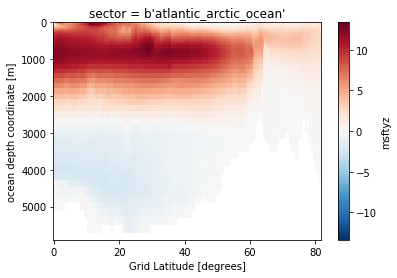

In [16]:
streamfunction_1=streamfunction.sel(rlat=slice(0,90),basin=0)  #select the Northern Hemisphere and the Atlantic basin
streamfunction_2=streamfunction_1*1e-9   # convert units: 1 kg/s = 1*(10)^(-9) Sv
streamfunction_2.mean(dim='time').plot(yincrease=False)